In [1]:
# ! pip install yfinance
import Ab as ab
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Get data from yahoo finance
sd = dt.datetime(1998,12,4)
ed = dt.datetime(2023,3,14)
# 1x leveraged nasdaq 100 etf
qqq = ab.StockData('QQQ')
qqq.get_data_from_yfinance('QQQ', sd, ed)
# 2x leveraged nasdaq 100 etf
qld = ab.StockData('QLD')
qld.get_data_from_yfinance('QLD', sd, ed)
# 3x leveraged nasdaq 100 etf
tqqq = ab.StockData('TQQQ')
tqqq.get_data_from_yfinance('TQQQ', sd, ed)
#nasdaq 100 index
ndx = ab.StockData('NDX')
ndx.get_data_from_yfinance('NDX', sd, ed)
#S&P 500 etf
spy = ab.StockData('SPY')
spy.get_data_from_yfinance('SPY', sd, ed)
#nasdaq stocks above 200 day moving average percentage
naa200r = ab.StockData('NAA200R')
naa200r.get_data_from_csv('data/NAA200R.csv')

GPU acceleration is available
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [2]:


def naa200r_performance(ticker, sd, ed, signal_ma_window = 20, buy_threshold = 15 , sell_threshold = 30,  visualization=True):
    
    signal_data = naa200r.data.sort_index().loc[sd:ed].copy()
    ticker_data = ticker.data.sort_index().loc[sd:ed].copy()
    ticker_name = ticker.ticker
    
    threshold_strategy = ab.Threshold(name = 'NAA200R',
                                    buy_threshold = buy_threshold , sell_threshold = sell_threshold , 
                                    signal_ma_window=signal_ma_window )

    # run strategy
    threshold_strategy.run_strategy(naa200r, sd , ed)
    naa200r_threshold_bt = ab.BackTest()
    naa200r_threshold_bt.run_backtest(threshold_strategy, ticker, sd , ed)
    print(naa200r_threshold_bt.performance_summary())


    if visualization == True:
        
        # get trade list
        df_balance = naa200r_threshold_bt.balance
        df_balance['Trade'] = np.where(df_balance['Stock'].diff()>0, 1, np.where(df_balance['Stock'].diff()<0, -1, 0))

        # plots
        fig = plt.figure(figsize=(16,4))
        signal_data['Close'].plot(label='NAA200R')
        signal_data['Close'].rolling(signal_ma_window).mean().plot(label='NAA200R MA{}'.format(signal_ma_window))


        plt.axhline(y = 15, color = 'black', linestyle='dashed') 
        plt.axhline(y = 30, color = 'black', linestyle='dashed') 

        trades = df_balance.loc[df_balance['Trade']!=0]
        for idx, row in trades.iterrows():
            if row['Trade']<0:
                plt.axvline(x=idx, color = 'red', linestyle='dashed') 
            if row['Trade']>0:
                plt.axvline(x=idx, color = 'green', linestyle='dashed') 

        plt.ylim([0, 50])
        plt.title('Trading Signals And NAA200R')
        plt.legend()
        plt.show()

        fig = plt.figure(figsize=(16,4))
        ticker_data['Close'].plot()

        trades = df_balance.loc[df_balance['Trade']!=0]
        for idx, row in trades.iterrows():
            if row['Trade']<0:
                plt.axvline(x=idx, color = 'red', linestyle='dashed') 
            if row['Trade']>0:
                plt.axvline(x=idx, color = 'green', linestyle='dashed') 
        plt.title('Trading Signals And {}'.format(ticker_name))
        plt.show()

        fig = plt.figure(figsize=(16,4))
        df_balance.plot(y = 'Total', title = 'Portfolio Performance of {}'.format(ticker_name), figsize=(16,4))


NAA200R 15/50 MA 50: 
cumulative return      : 465.39%
compound anual return  : 5.0855% 
max_drawdown           : -28.66%
sharp_ratio            : 4.01%
average of daily return: 0.0367%
std of daily return    : 0.9147%
number of trades       : 97,
trading days           : 7740,
Betting Average        : 40.62%
Gain Average           : 8.74%
Loss Average           : -2.36%
Risk Reward Ratio      : 3.70
Gain STD               : 10.29%
Loss STD               : 2.36%
        
None


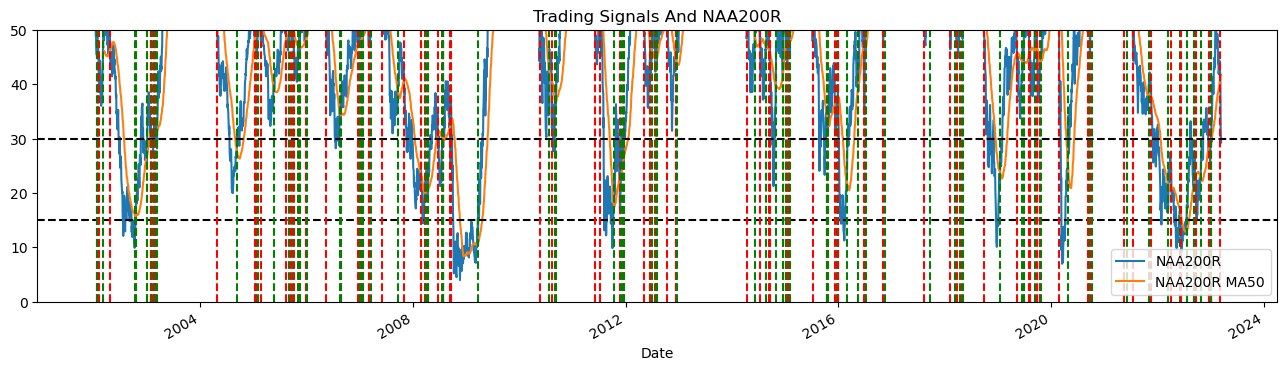

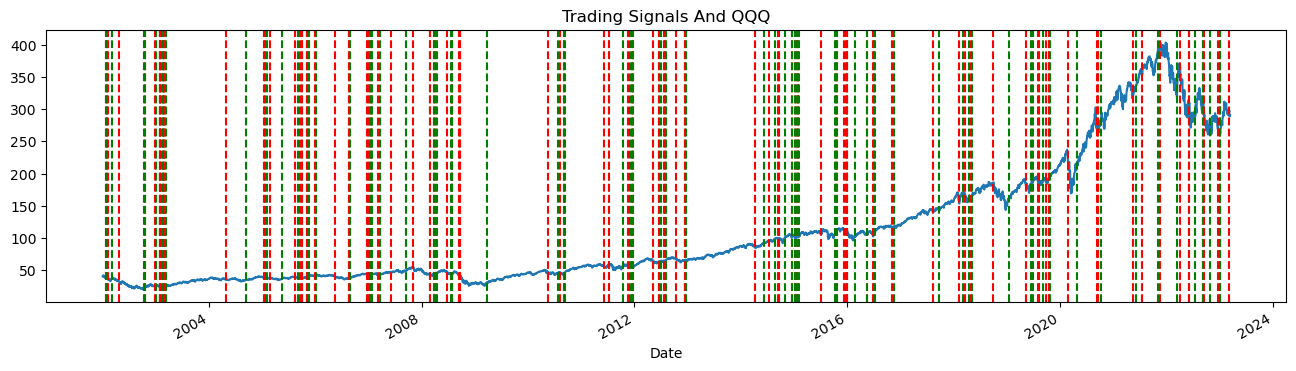

<Figure size 1600x400 with 0 Axes>

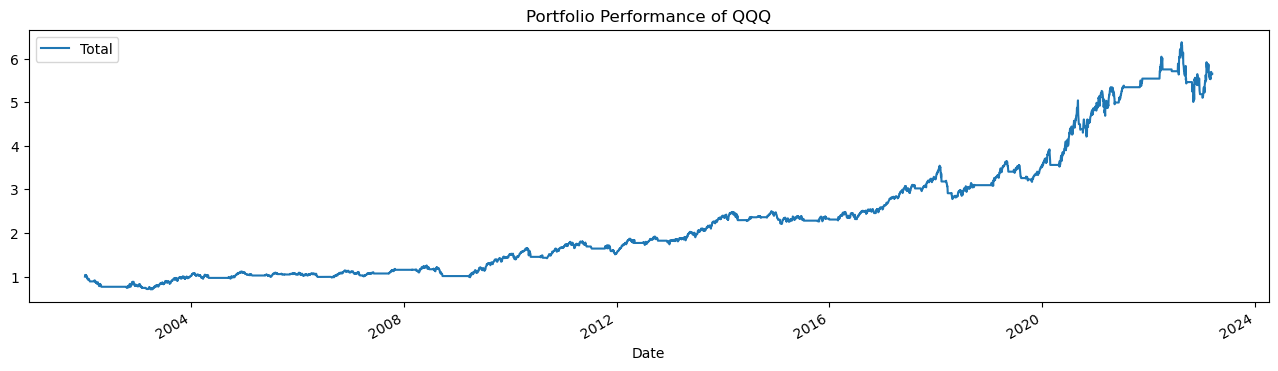

In [3]:

sd = dt.datetime(2002,1,1)
ed = dt.datetime(2023,3,14)
signal_ma_window = 50
buy_threshold = 15
sell_threshold = 50
ticker = qqq

naa200r_performance(ticker, sd, ed, signal_ma_window, buy_threshold , sell_threshold,  visualization=True)


NAA200R 15/30 MA 20: 
cumulative return      : 5837.86%
compound anual return  : 18.4660% 
max_drawdown           : -43.97%
sharp_ratio            : 5.68%
average of daily return: 0.1196%
std of daily return    : 2.1063%
number of trades       : 43,
trading days           : 6097,
Betting Average        : 40.48%
Gain Average           : 52.41%
Loss Average           : -5.88%
Risk Reward Ratio      : 8.91
Gain STD               : 77.10%
Loss STD               : 4.09%
        
None


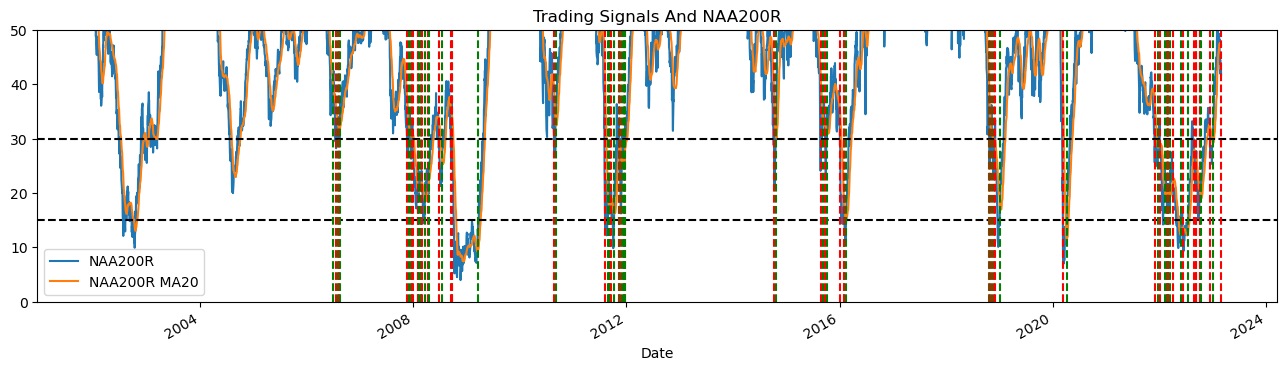

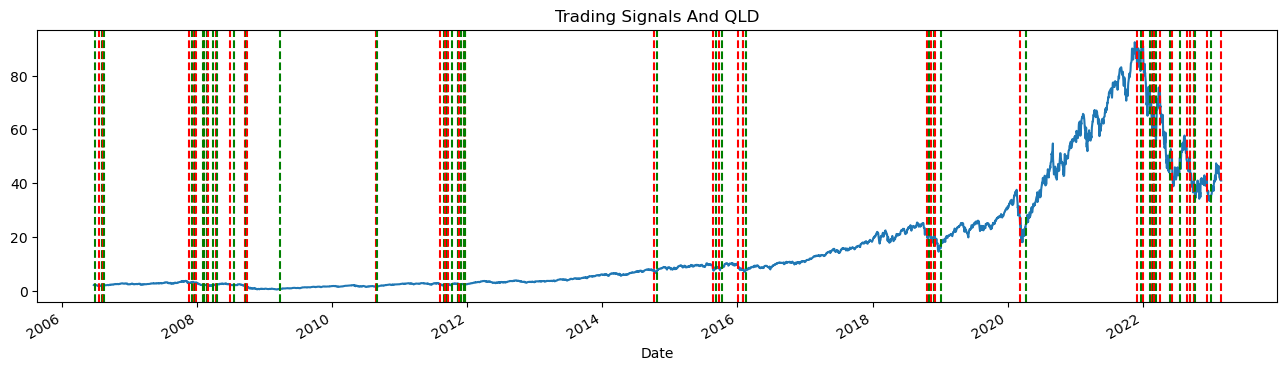

<Figure size 1600x400 with 0 Axes>

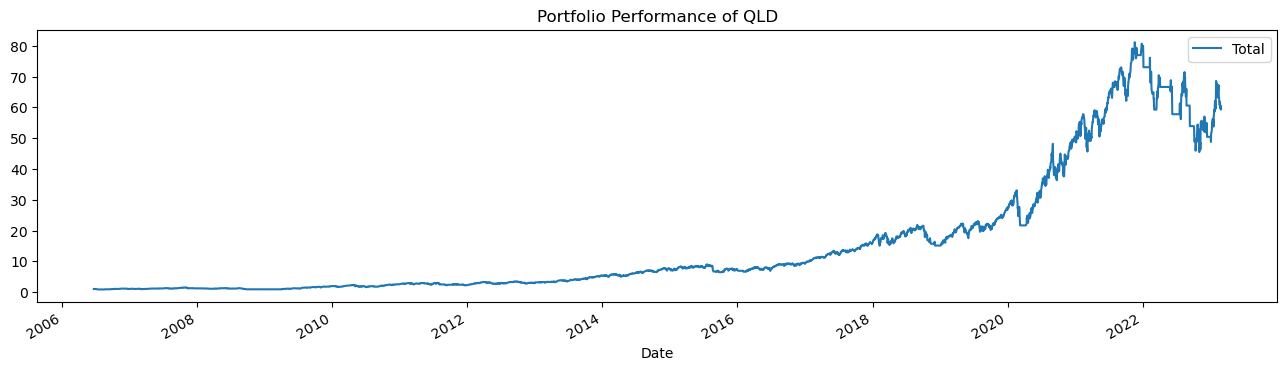

In [4]:
sd = dt.datetime(2002,1,1)
ed = dt.datetime(2023,3,1)
signal_ma_window = 20
buy_threshold = 15
sell_threshold = 30
ticker = qld

naa200r_performance(ticker, sd, ed, signal_ma_window, buy_threshold , sell_threshold,  visualization=True)


NAA200R 30/30 MA 50: 
cumulative return      : 411.79%
compound anual return  : 4.6714% 
max_drawdown           : -47.91%
sharp_ratio            : 3.44%
average of daily return: 0.0361%
std of daily return    : 1.0498%
number of trades       : 29,
trading days           : 7740,
Betting Average        : 39.29%
Gain Average           : 31.80%
Loss Average           : -6.44%
Risk Reward Ratio      : 4.94
Gain STD               : 27.42%
Loss STD               : 7.84%
        
None


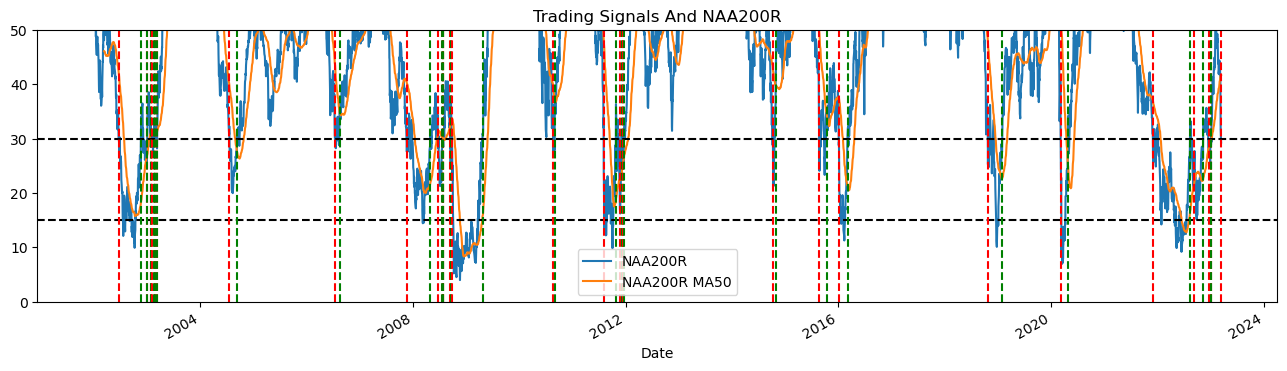

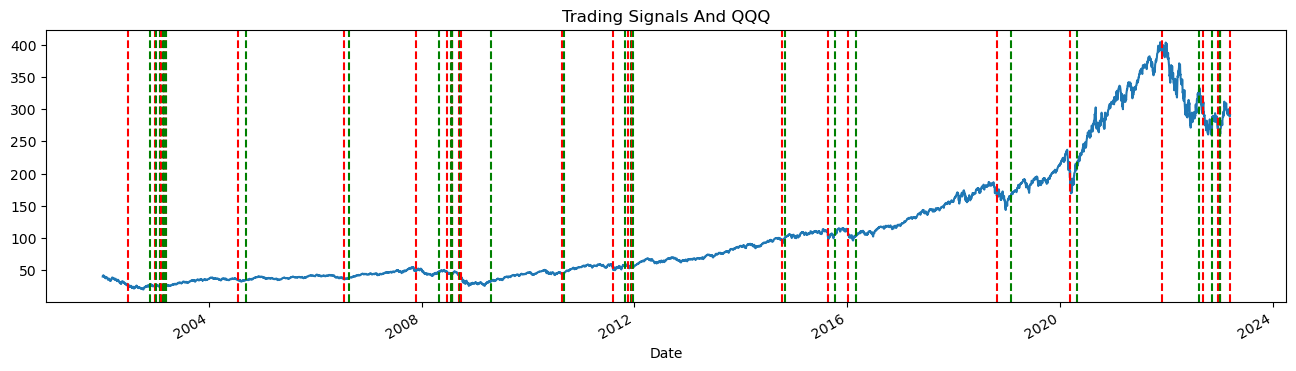

<Figure size 1600x400 with 0 Axes>

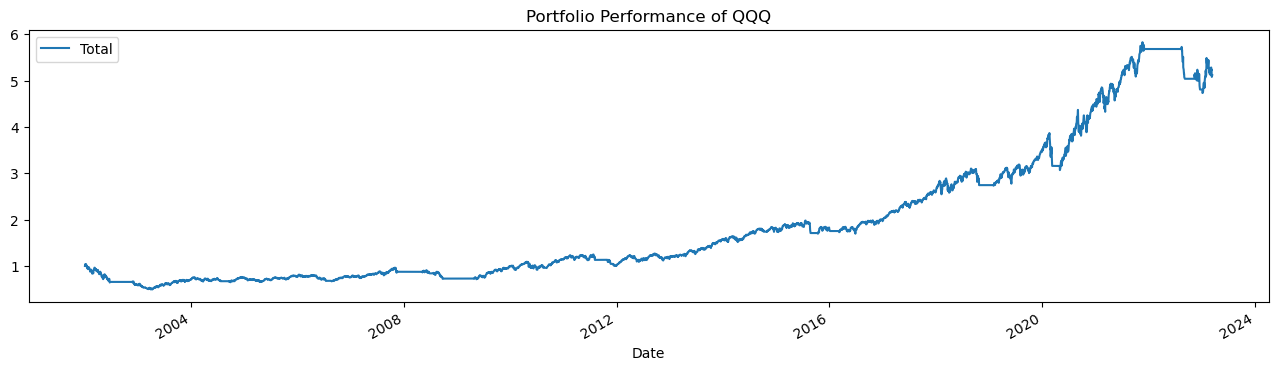

In [5]:
sd = dt.datetime(2002,1,1)
ed = dt.datetime(2023,3,14)
signal_ma_window = 50
buy_threshold = 30
sell_threshold = 30
ticker = qqq

naa200r_performance(qqq, sd, ed, signal_ma_window, buy_threshold , sell_threshold,  visualization=True)

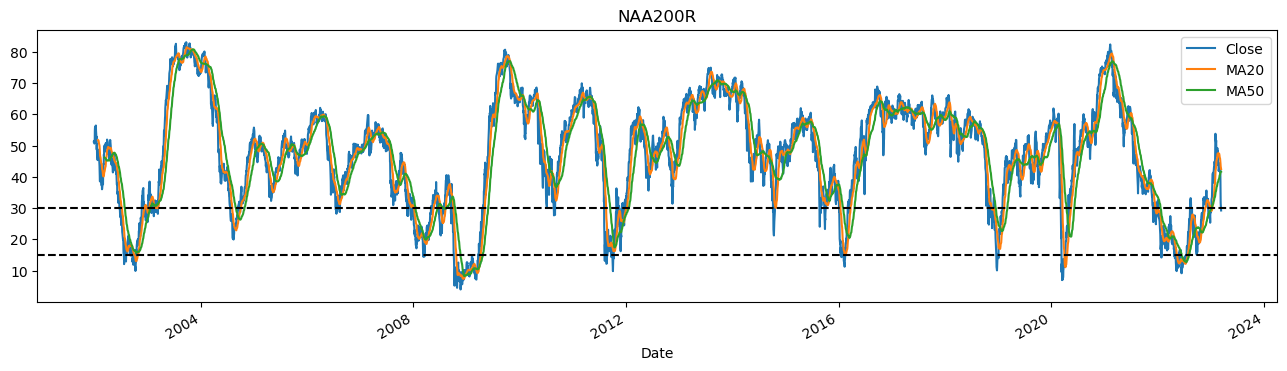

<Axes: xlabel='Date'>

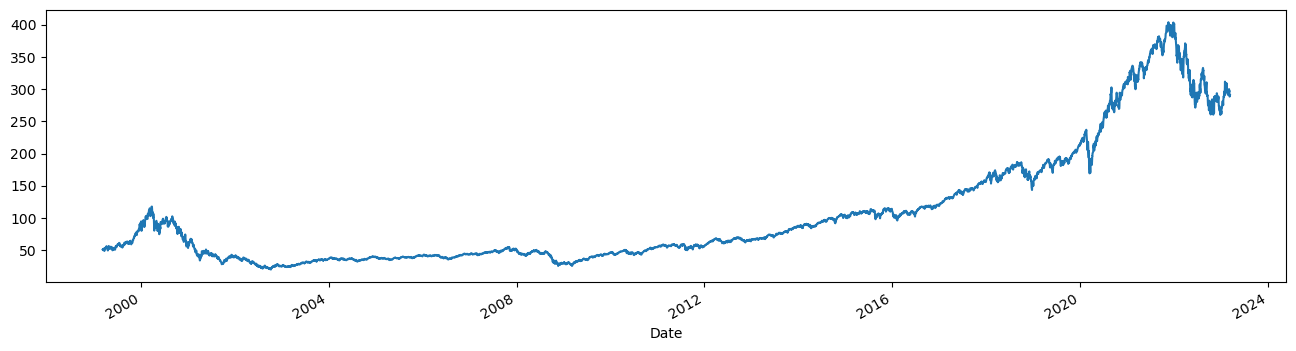

In [6]:
fig = plt.figure(figsize=(16,4))
naa200r.data.sort_index()['Close'].plot(title='NAA200R')
plt.plot(naa200r.data.sort_index()[['Close']].rolling(20).mean(), label='MA20')
plt.plot(naa200r.data.sort_index()[['Close']].rolling(50).mean(), label='MA50')

plt.axhline(y = 15, color = 'black', linestyle='dashed') 
plt.axhline(y = 30, color = 'black', linestyle='dashed') 
plt.legend()
plt.show()


qqq.data.sort_index()['Close'].plot(figsize=(16,4))